# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.finalproject # use or create a database named final project
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [ ]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [ ]:
track = ['covid19'] # define the keywords, tweets contain election

locations = [43.0323925,-110.1954062 ] 

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [12]:
count = 100 #number of returned tweets, default and max is 100
geocode = "43.0323925,-110.1954062,200mi"  # defin the location, in Wyoming
q = "covid"                               #define the keywords, tweets contain covid19

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [13]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Dec 02 20:35:52 +0000 2021'
'Thu Dec 02 20:34:25 +0000 2021'
'Thu Dec 02 20:34:15 +0000 2021'
'Thu Dec 02 20:31:48 +0000 2021'
'Thu Dec 02 20:31:48 +0000 2021'
'Thu Dec 02 20:28:16 +0000 2021'
'Thu Dec 02 20:27:30 +0000 2021'
'Thu Dec 02 20:27:20 +0000 2021'
'Thu Dec 02 20:25:29 +0000 2021'
'Thu Dec 02 20:25:06 +0000 2021'
'Thu Dec 02 20:24:56 +0000 2021'
'Thu Dec 02 20:22:43 +0000 2021'


Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Dec 01 11:59:56 +0000 2021'
'Wed Dec 01 02:48:51 +0000 2021'
'Wed Dec 01 02:48:10 +0000 2021'
'Wed Dec 01 02:48:09 +0000 2021'
'Wed Dec 01 02:47:06 +0000 2021'
'Wed Dec 01 02:44:48 +0000 2021'
'Wed Dec 01 02:42:51 +0000 2021'
'Wed Dec 01 02:35:16 +0000 2021'
'Wed Dec 01 02:31:20 +0000 2021'
'Wed Dec 01 02:24:40 +0000 2021'
'Wed Dec 01 02:08:28 +0000 2021'
'Wed Dec 01 02:07:33 +0000 2021'
'Wed Dec 01 02:04:03 +0000 2021'
'Wed Dec 01 01:55:32 +0000 2021'
'Wed Dec 01 01:51:34 +0000 2021'
'Wed Dec 01 01:47:46 +0000 2021'
'Wed Dec 01 01:43:14 +0000 2021'
'Wed Dec 01 01:41:51 +0000 2021'
'Wed Dec 01 01:38:20 +0000 2021'
'Wed Dec 01 01:35:42 +0000 2021'
'Wed Dec 01 01:34:57 +0000 2021'
'Wed Dec 01 01:32:55 +0000 2021'
'Wed Dec 01 01:28:53 +0000 2021'
'Wed Dec 01 01:24:26 +0000 2021'
'Wed Dec 01 01:24:00 +0000 2021'
'Wed Dec 01 01:22:22 +0000 2021'
'Wed Dec 01 01:19:53 +0000 2021'
'Wed Dec 01 01:08:37 +0000 2021'
'Wed Dec 01 01:06:28 +0000 2021'
'Wed Dec 01 01:04:28 +0000 2021'
'Wed Dec 0

'Tue Nov 30 05:23:52 +0000 2021'
'Tue Nov 30 05:14:51 +0000 2021'
'Tue Nov 30 05:02:05 +0000 2021'
'Tue Nov 30 05:00:18 +0000 2021'
'Tue Nov 30 05:00:05 +0000 2021'
'Tue Nov 30 05:00:00 +0000 2021'
'Tue Nov 30 04:58:18 +0000 2021'
'Tue Nov 30 04:50:28 +0000 2021'
'Tue Nov 30 04:42:46 +0000 2021'
'Tue Nov 30 04:33:02 +0000 2021'
'Tue Nov 30 04:30:25 +0000 2021'
'Tue Nov 30 04:30:00 +0000 2021'
'Tue Nov 30 04:28:53 +0000 2021'
'Tue Nov 30 04:24:45 +0000 2021'
'Tue Nov 30 04:22:56 +0000 2021'
'Tue Nov 30 04:18:44 +0000 2021'
'Tue Nov 30 04:17:54 +0000 2021'
'Tue Nov 30 04:16:26 +0000 2021'
'Tue Nov 30 04:14:10 +0000 2021'
'Tue Nov 30 04:10:55 +0000 2021'
'Tue Nov 30 04:03:17 +0000 2021'
'Tue Nov 30 03:49:29 +0000 2021'
'Tue Nov 30 03:31:31 +0000 2021'
'Tue Nov 30 03:30:03 +0000 2021'
'Tue Nov 30 03:26:42 +0000 2021'
'Tue Nov 30 03:21:33 +0000 2021'
'Tue Nov 30 03:09:37 +0000 2021'
'Tue Nov 30 03:03:04 +0000 2021'
'Tue Nov 30 02:59:19 +0000 2021'
'Tue Nov 30 02:57:45 +0000 2021'
'Tue Nov 3

'Mon Nov 29 13:20:05 +0000 2021'
'Mon Nov 29 13:18:39 +0000 2021'
'Mon Nov 29 13:16:35 +0000 2021'
'Mon Nov 29 13:16:23 +0000 2021'
'Mon Nov 29 13:15:57 +0000 2021'
'Mon Nov 29 13:15:26 +0000 2021'
'Mon Nov 29 13:12:34 +0000 2021'
'Mon Nov 29 13:04:21 +0000 2021'
'Mon Nov 29 13:02:41 +0000 2021'
'Mon Nov 29 12:50:33 +0000 2021'
'Mon Nov 29 12:47:25 +0000 2021'
'Mon Nov 29 12:28:42 +0000 2021'
'Mon Nov 29 12:26:48 +0000 2021'
'Mon Nov 29 12:25:53 +0000 2021'
'Mon Nov 29 12:24:01 +0000 2021'
'Mon Nov 29 12:21:07 +0000 2021'
'Mon Nov 29 12:17:40 +0000 2021'
'Mon Nov 29 12:16:00 +0000 2021'
'Mon Nov 29 12:04:50 +0000 2021'
'Mon Nov 29 12:00:59 +0000 2021'
'Mon Nov 29 11:50:18 +0000 2021'
'Mon Nov 29 11:43:33 +0000 2021'
'Mon Nov 29 11:41:45 +0000 2021'
'Mon Nov 29 11:14:52 +0000 2021'
'Mon Nov 29 11:12:35 +0000 2021'
'Mon Nov 29 11:11:07 +0000 2021'
'Mon Nov 29 10:57:46 +0000 2021'
'Mon Nov 29 09:18:52 +0000 2021'
'Mon Nov 29 09:02:38 +0000 2021'
'Mon Nov 29 08:54:55 +0000 2021'
'Mon Nov 2

'Sun Nov 28 00:04:15 +0000 2021'
'Sun Nov 28 00:03:45 +0000 2021'
'Sun Nov 28 00:00:40 +0000 2021'
'Sun Nov 28 00:00:07 +0000 2021'
'Sat Nov 27 23:59:16 +0000 2021'
'Sat Nov 27 23:51:34 +0000 2021'
'Sat Nov 27 23:49:39 +0000 2021'
'Sat Nov 27 23:38:27 +0000 2021'
'Sat Nov 27 23:37:36 +0000 2021'
'Sat Nov 27 23:36:20 +0000 2021'
'Sat Nov 27 23:29:25 +0000 2021'
'Sat Nov 27 23:13:56 +0000 2021'
'Sat Nov 27 23:12:20 +0000 2021'
'Sat Nov 27 23:01:59 +0000 2021'
'Sat Nov 27 22:44:15 +0000 2021'
'Sat Nov 27 22:32:31 +0000 2021'
'Sat Nov 27 22:23:24 +0000 2021'
'Sat Nov 27 22:23:15 +0000 2021'
'Sat Nov 27 22:13:46 +0000 2021'
'Sat Nov 27 22:11:19 +0000 2021'
'Sat Nov 27 22:07:15 +0000 2021'
'Sat Nov 27 21:41:50 +0000 2021'
'Sat Nov 27 21:35:55 +0000 2021'
'Sat Nov 27 21:35:53 +0000 2021'
'Sat Nov 27 21:35:12 +0000 2021'
'Sat Nov 27 21:30:53 +0000 2021'
'Sat Nov 27 21:24:35 +0000 2021'
'Sat Nov 27 21:06:35 +0000 2021'
'Sat Nov 27 21:00:01 +0000 2021'
'Sat Nov 27 20:44:26 +0000 2021'
'Sat Nov 2

'Fri Nov 26 18:30:16 +0000 2021'
'Fri Nov 26 18:30:03 +0000 2021'
'Fri Nov 26 18:28:57 +0000 2021'
'Fri Nov 26 18:27:56 +0000 2021'
'Fri Nov 26 18:24:30 +0000 2021'
'Fri Nov 26 18:22:37 +0000 2021'
'Fri Nov 26 18:21:59 +0000 2021'
'Fri Nov 26 18:21:34 +0000 2021'
'Fri Nov 26 18:16:27 +0000 2021'
'Fri Nov 26 18:16:00 +0000 2021'
'Fri Nov 26 18:15:04 +0000 2021'
'Fri Nov 26 18:07:41 +0000 2021'
'Fri Nov 26 18:07:36 +0000 2021'
'Fri Nov 26 18:06:28 +0000 2021'
'Fri Nov 26 17:55:28 +0000 2021'
'Fri Nov 26 17:53:16 +0000 2021'
'Fri Nov 26 17:46:38 +0000 2021'
'Fri Nov 26 17:37:56 +0000 2021'
'Fri Nov 26 17:36:38 +0000 2021'
'Fri Nov 26 17:27:21 +0000 2021'
'Fri Nov 26 17:14:17 +0000 2021'
'Fri Nov 26 17:06:09 +0000 2021'
'Fri Nov 26 17:04:23 +0000 2021'
'Fri Nov 26 17:02:18 +0000 2021'
'Fri Nov 26 17:02:18 +0000 2021'
'Fri Nov 26 16:59:19 +0000 2021'
'Fri Nov 26 16:55:54 +0000 2021'
'Fri Nov 26 16:53:23 +0000 2021'
'Fri Nov 26 16:53:09 +0000 2021'
'Fri Nov 26 16:53:05 +0000 2021'
'Fri Nov 2

'Thu Nov 25 00:13:36 +0000 2021'
'Thu Nov 25 00:00:16 +0000 2021'
'Wed Nov 24 23:55:44 +0000 2021'
'Wed Nov 24 23:54:41 +0000 2021'
'Wed Nov 24 23:49:29 +0000 2021'
'Wed Nov 24 23:49:13 +0000 2021'
'Wed Nov 24 23:44:11 +0000 2021'
'Wed Nov 24 23:43:05 +0000 2021'
'Wed Nov 24 23:41:18 +0000 2021'
'Wed Nov 24 23:40:21 +0000 2021'
'Wed Nov 24 23:28:36 +0000 2021'
'Wed Nov 24 23:24:30 +0000 2021'
'Wed Nov 24 23:20:58 +0000 2021'
'Wed Nov 24 23:20:29 +0000 2021'
'Wed Nov 24 23:10:19 +0000 2021'
'Wed Nov 24 23:07:50 +0000 2021'
'Wed Nov 24 23:07:37 +0000 2021'
'Wed Nov 24 23:00:00 +0000 2021'
'Wed Nov 24 22:54:25 +0000 2021'
'Wed Nov 24 22:52:18 +0000 2021'
'Wed Nov 24 22:44:25 +0000 2021'
'Wed Nov 24 22:41:29 +0000 2021'
'Wed Nov 24 22:37:00 +0000 2021'
'Wed Nov 24 22:31:50 +0000 2021'
'Wed Nov 24 22:27:36 +0000 2021'
'Wed Nov 24 22:14:38 +0000 2021'
'Wed Nov 24 22:13:11 +0000 2021'
'Wed Nov 24 22:02:25 +0000 2021'
'Wed Nov 24 22:00:35 +0000 2021'
'Wed Nov 24 22:00:00 +0000 2021'
'Wed Nov 2

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2202
1029


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Ponziconomist (💎,💎)
text: 2020: COVID &amp; DeFi 
2021: COVID &amp; NFTs 
2022: COVID &amp; ?
----
name: JohnnyBeHood
text: Fucc Covid.. but I miss that Covid traffic..🤣🤣🤣
----
name: Ten of Nine
text: @LifeLongSunsFan @emman_exe2 @statmuse He's been out 1 with covid. The other 70 are other shit. Covid ain't the meaning here.
----
name: Lanny Lin😷🧢
text: @SharonGF_NBCT Yeah, covid will disappear once the election is over.

Yeah, kids don't get covid.

I am so angry!
----
name: Sloop Josh B
text: @bobdaduck @SetteSpade7x70 You get a COVID variant, and you get a COVID variant… https://t.co/g0MY3FIv38
----
name: Bob Gnarly
text: The war on drugs increased drugs
The war on terror increased terror
The war on covid increased covid
----
name: Christopher Hansen
text: @UtahCoronavirus What % of covid pediatric hospitalizations at intermountain are admitted *for* covid vs those *wit… https://t.co/YcdzVtXMOK
----
name: Demeter
text: Woooooo!!!! First shower in 6 days bcuz of Covid!!!! 

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,61a92fd2985db71f585aaa23,Fri Nov 26 21:03:16 +0000 2021,1464338991562563588,1464338991562563588,2020: COVID &amp; DeFi \n2021: COVID &amp; NFT...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,61a92fbc985db71f585aa64c,Wed Dec 01 01:04:28 +0000 2021,1465849243298455557,1465849243298455557,Fucc Covid.. but I miss that Covid traffic..🤣🤣🤣,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,61a92b1fe717d5e091b376d0,Wed Dec 01 13:44:43 +0000 2021,1466040566962032643,1466040566962032643,@LifeLongSunsFan @emman_exe2 @statmuse He's be...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.465832e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,61a92b20e717d5e091b3770e,Wed Dec 01 05:17:52 +0000 2021,1465913015165804548,1465913015165804548,"@SharonGF_NBCT Yeah, covid will disappear once...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.465700e+18,...,0,3,False,False,en,NaN,NaN,NaN,NaN,NaN
4,61a92fd2985db71f585aaa11,Fri Nov 26 22:22:55 +0000 2021,1464359037818990594,1464359037818990594,@bobdaduck @SetteSpade7x70 You get a COVID var...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.464351e+18,...,0,1,False,False,en,"{'media': [{'id': 1464359032198557699, 'id_str...",False,NaN,NaN,NaN
5,61a92fcf985db71f585aa9a8,Sat Nov 27 12:42:04 +0000 2021,1464575249324912644,1464575249324912644,The war on drugs increased drugs\nThe war on t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,61a92fd3985db71f585aaa51,Fri Nov 26 18:21:34 +0000 2021,1464298298173313027,1464298298173313027,@UtahCoronavirus What % of covid pediatric hos...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.464297e+18,...,0,2,False,False,en,NaN,False,1.463565e+18,1463565327195852801,{'created_at': 'Wed Nov 24 17:49:00 +0000 2021...
7,61a92fce985db71f585aa967,Sat Nov 27 19:19:12 +0000 2021,1464675188776349697,1464675188776349697,Woooooo!!!! First shower in 6 days bcuz of Cov...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,12,False,False,en,NaN,NaN,NaN,NaN,NaN
8,61a92fc2985db71f585aa72d,Tue Nov 30 05:55:33 +0000 2021,1465560108755259393,1465560108755259393,Not all COVID tests are sequenced for variants...,False,"{'hashtags': [{'text': 'Omicron', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,5,False,False,en,NaN,False,NaN,NaN,NaN
9,61a92b20e717d5e091b37725,Wed Dec 01 03:03:59 +0000 2021,1465879320279371780,1465879320279371780,MY COVID TEST CAME BACK NEGATIVE!!!! I DONT HA...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1,17,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

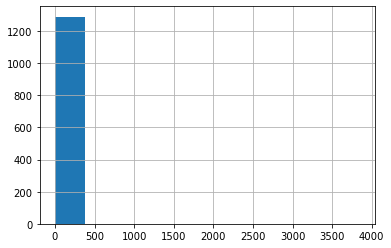

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count